In [10]:
import numpy as np
train_set = np.load('../data/HG002_2_3_00_400k_train.npz')
train_set.files

['features', 'labels', 'read_ids']

In [11]:
test_set = np.load('../data/HG002_2_3_00_400k_test.npz')
test_set.files

['features', 'labels', 'read_ids']

In [12]:
val_set = np.load('../data/HG002_2_3_00_400k_val.npz')
val_set.files

['features', 'labels', 'read_ids']

In [54]:
features = train_set['features']
features.shape

(256000, 6, 15)

In [55]:
features[0]

# ACGT, base quality, m6a score (dorado output normalized)
# left to right (7 before - central - 7 after)
# 7 or less

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        , 1.        , 1.        ],
       [0.16078431, 0.17647059, 0.16078431, 0.16078431, 0.19607843,
        0.15686275, 0.15686275, 0.19607843, 0.19607843, 0.15686275,
        0.16470588, 0.19607843, 0.15294118, 

In [56]:
# compare base quality
print(np.min(features[:, 4, :]))
print(np.max(features[:, 4, :]))

0.00392156862745098
0.19607843137254902


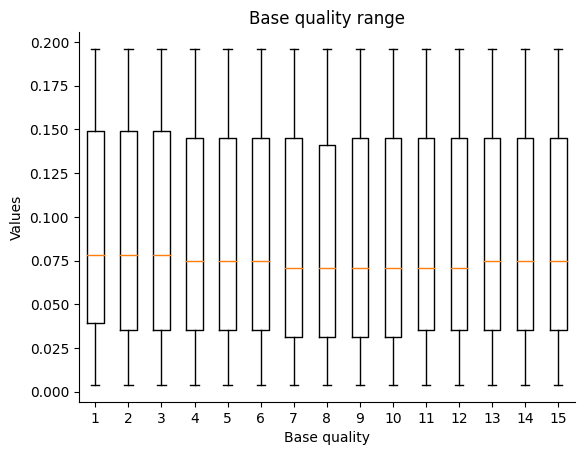

In [57]:
import matplotlib.pyplot as plt

data_to_plot = features[:, 4, :]

plt.boxplot(data_to_plot)

plt.xlabel('Base quality')
plt.ylabel('Values')
plt.title('Base quality range')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [58]:
above_threshold_mask = features[:, 4, :] > 0.05
all_above_threshold = np.all(above_threshold_mask, axis=1)
np.sum(all_above_threshold)

121907

In [59]:
2616972/5120000 * 100

51.112734375

In [60]:
labels = train_set['labels']
labels.shape

(256000,)

In [61]:
np.unique(labels, return_counts=True)
# balanced dataset

(array([0, 1], dtype=int64), array([128000, 128000], dtype=int64))

In [62]:
read_ids = train_set['read_ids']
read_ids.shape

(256000,)

In [63]:
print(len(np.unique(read_ids)))
np.unique(read_ids)

10589


array(['0010e35b-3962-44eb-84b5-f33166fd32ce',
       '001a12e3-3b0c-446a-9b5b-e5f0f6bb8a2b',
       '00267282-ee7f-4f39-b12e-3a281a4dd7ef', ...,
       'fff2267a-1ce5-4634-8323-4d181a2c754b',
       'fff4ab3e-a1db-44c3-9d33-b5052bfd5ca8',
       'ffffa7d9-dacb-42c5-a2c2-34045fdf594a'], dtype='<U36')

In [6]:
import numpy as np

# get bases loop form

def filter_set_by_base_quality(data, quality_threshold=0.05, drop_base_quality=True):
    features = data['features']
    labels = data['labels']

    list_above_threshold = []
    
    for i in range(features.shape[0]):
        if features[i, 4, 7] > quality_threshold:
            list_above_threshold.append(i)
    
    above_threshold_indices = np.array(list_above_threshold)
    
    above_threshold_features = features[above_threshold_indices]
    above_threshold_labels = labels[above_threshold_indices]
    
    if drop_base_quality:
        above_threshold_features = above_threshold_features[:, np.arange(above_threshold_features.shape[1]) != 4, :]
    
    return above_threshold_features, above_threshold_labels

filtered_features, filtered_labels = filter_set_by_base_quality(train_set)


# vectorized version

# def filter_set_by_base_quality(data, quality_threshold=0.05, drop_base_quality=True):
#     features = data['features']
#     labels = data['labels']

#     above_threshold_mask = features[:, 4, :] > quality_threshold
#     all_above_threshold_features = features[:, above_threshold_mask, :]

#     all_above_threshold_indices = np.where(all_above_threshold_features)[0]


#     if drop_base_quality:
#         mask = np.arange(features.shape[1]) != 4
#         all_above_threshold_features = all_above_threshold_features[:, mask, :]

    
#     print(len(all_above_threshold_indices))
    
#     all_above_threshold_labels = labels[all_above_threshold_indices]

#     return all_above_threshold_features, all_above_threshold_labels


In [65]:
print(len(filtered_features) == len(filtered_labels))
print(filtered_features.shape)
len(filtered_features) / len(train_set['features']) * 100

True
(163831, 5, 15)


63.996484374999994

In [7]:
def set_num_nucleotides(features, num = 5):
    if num > 7:
        print('Cannot have more than 7 nucleotides.')
    else:
        num_to_remove = 7 - num
        
        keep_from_start = num_to_remove
        keep_from_end = features.shape[2] - num_to_remove

        new_features = features[:, :, keep_from_start:keep_from_end]
        
        return new_features

filtered_features = set_num_nucleotides(filtered_features, 7)
filtered_features.shape

(163831, 5, 15)

c:\Users\Cat\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Cat\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


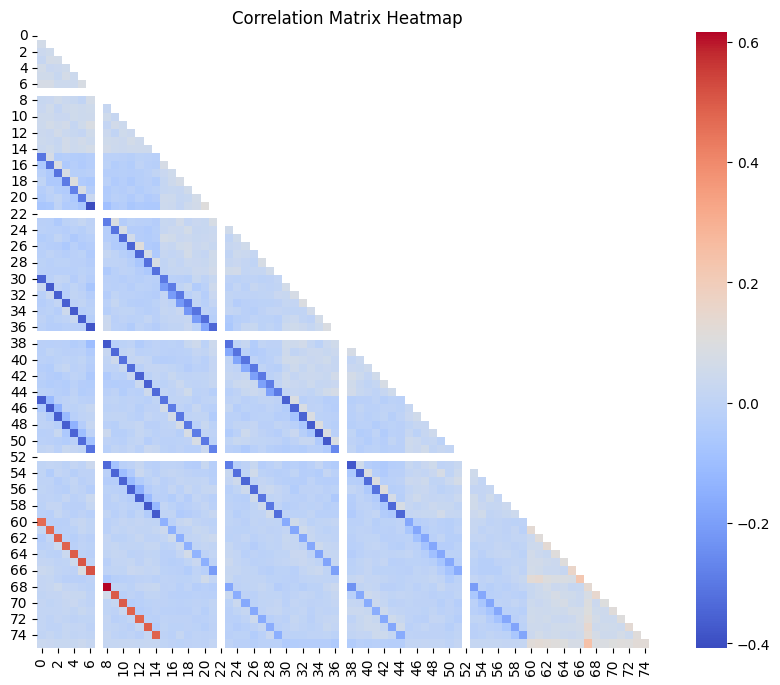

In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

original_shape = filtered_features.shape

# reformat features into 2D and add label
corr_matrix_data = filtered_features.reshape(original_shape[0], -1)
filtered_labels_reshaped = filtered_labels.reshape(-1, 1)
corr_matrix_data = np.hstack((corr_matrix_data, filtered_labels_reshaped))
correlation_matrix = np.corrcoef(corr_matrix_data, rowvar=False)

# extract the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [68]:
np.unique(corr_matrix_data[:, 5])

array([0., 1.])

In [69]:
(38 + 1) %  5

4

In [70]:
(5 + 1) %  5

1

In [71]:
(27 + 1) %  5

3

In [72]:
(16 + 1) %  5

2

In [73]:
# prep for model input

X_train = filtered_features.transpose((0, 2, 1))
y_train = filtered_labels

print(X_train.shape)

(163831, 15, 5)


In [74]:
# test data

test_filtered_features, test_filtered_labels = filter_set_by_base_quality(train_set)
test_filtered_features = set_num_nucleotides(test_filtered_features, 7)

X_test = test_filtered_features.transpose((0, 2, 1))
y_test = test_filtered_labels

In [75]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)


### LSTM benchmark

In [78]:
# basic lstm architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, input_shape=(15, 5)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

epochs = 20

for epoch in range(epochs):
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32)
    
    train_loss_history.append(history.history['loss'])
    train_accuracy_history.append(history.history['accuracy'])
    val_loss_history.append(history.history['val_loss'])
    val_accuracy_history.append(history.history['val_accuracy'])
    
    print(f"Epoch {epoch + 1}/{epochs} - "
          f"Train Loss: {history.history['loss'][0]:.4f}, "
          f"Train Acc: {history.history['accuracy'][0]:.4f}, "
          f"Val Loss: {history.history['val_loss'][0]:.4f}, "
          f"Val Acc: {history.history['val_accuracy'][0]:.4f}")

4096/4096 [==============================] - 40s 9ms/step - loss: 0.6094 - accuracy: 0.6756 - val_loss: 0.5892 - val_accuracy: 0.6951
Epoch 1/20 - Train Loss: 0.6094, Train Acc: 0.6756, Val Loss: 0.5892, Val Acc: 0.6951
4096/4096 [==============================] - 38s 9ms/step - loss: 0.5846 - accuracy: 0.6937 - val_loss: 0.5774 - val_accuracy: 0.7014
Epoch 2/20 - Train Loss: 0.5846, Train Acc: 0.6937, Val Loss: 0.5774, Val Acc: 0.7014
4096/4096 [==============================] - 38s 9ms/step - loss: 0.5802 - accuracy: 0.6954 - val_loss: 0.5768 - val_accuracy: 0.7013
Epoch 3/20 - Train Loss: 0.5802, Train Acc: 0.6954, Val Loss: 0.5768, Val Acc: 0.7013
4096/4096 [==============================] - 38s 9ms/step - loss: 0.5776 - accuracy: 0.6968 - val_loss: 0.5744 - val_accuracy: 0.7029
Epoch 4/20 - Train Loss: 0.5776, Train Acc: 0.6968, Val Loss: 0.5744, Val Acc: 0.7029
4096/4096 [==============================] - 38s 9ms/step - loss: 0.5763 - accuracy: 0.6982 - val_loss: 0.5764 - val_acc

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Five input features and eleven time steps, so we have eleven sets of input and 
# recurrent weights for each of the five features at each time step.

lstm_layer = model.layers[0] 

weights = lstm_layer.get_weights()

input_weights = weights[0]
print("Input Weights Shape:", input_weights.shape)

# Recurrent weights
recurrent_weights = weights[1]
print("Recurrent Weights Shape:", recurrent_weights.shape)


Input Weights Shape: (5, 256)
Recurrent Weights Shape: (64, 256)


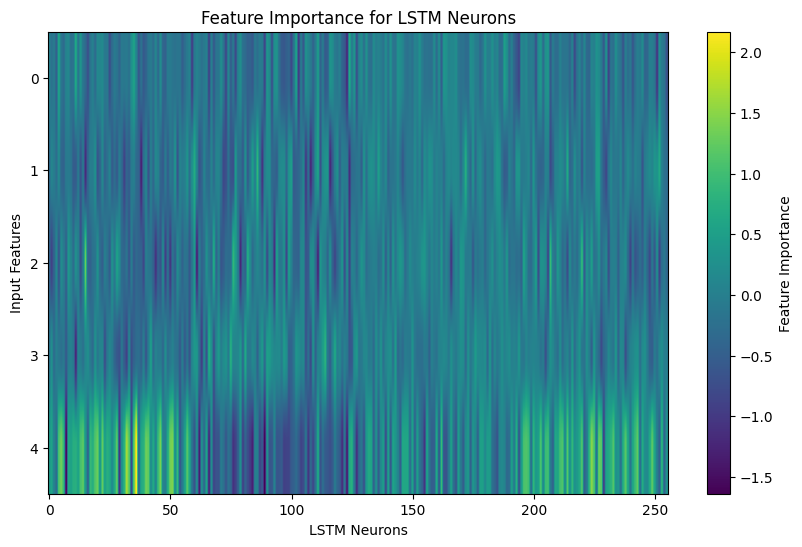

In [ ]:
import matplotlib.pyplot as plt

input_feature_importance = input_weights  # transpose for easier visualization

plt.figure(figsize=(10, 6))
plt.imshow(input_feature_importance, cmap='viridis', aspect='auto')
plt.colorbar(label='Feature Importance')
plt.ylabel('Input Features')
plt.xlabel('LSTM Neurons')
plt.title('Feature Importance for LSTM Neurons')
plt.show()


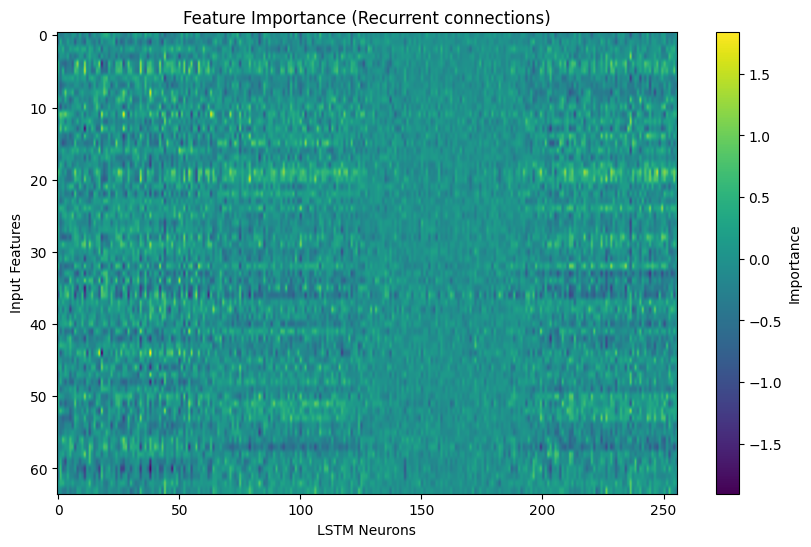

In [ ]:
import matplotlib.pyplot as plt

input_feature_importance = recurrent_weights  # transpose for easier visualization

plt.figure(figsize=(10, 6))
plt.imshow(input_feature_importance, cmap='viridis', aspect='auto')
plt.colorbar(label='Importance')
plt.ylabel('Input Features')
plt.xlabel('LSTM Neurons')
plt.title('Feature Importance (Recurrent connections)')
plt.show()


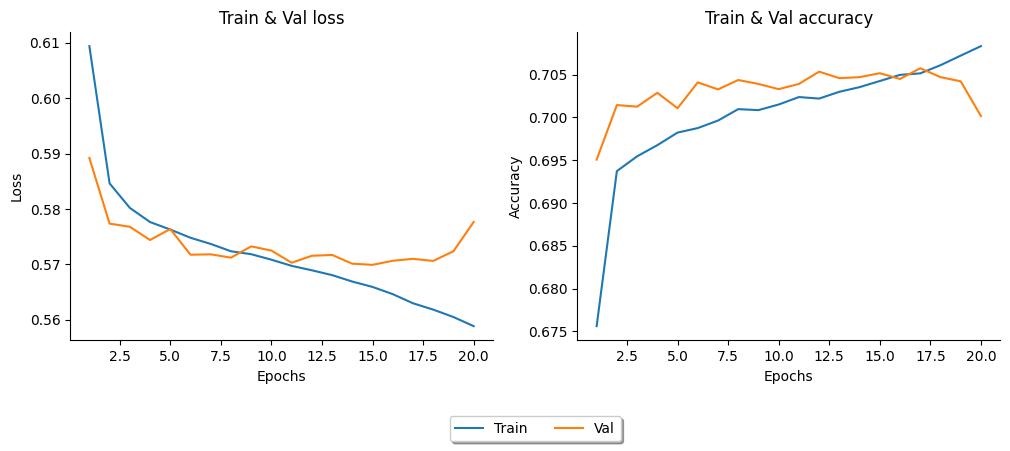

In [79]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('Train & Val loss')
plt.plot(range(1, epochs + 1), train_loss_history, label='Train')
plt.plot(range(1, epochs + 1), val_loss_history,label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(1, 2, 2)
plt.title('Train & Val accuracy')
plt.plot(range(1, epochs + 1), train_accuracy_history, label='Train')
plt.plot(range(1, epochs + 1), val_accuracy_history, label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc='lower center', bbox_to_anchor=(-0.1, -0.35), fancybox=True, shadow=True, ncol=2)

plt.show()

In [31]:
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)

5120/5120 [==============================] - 18s 3ms/step


In [32]:
np.unique(binary_predictions, return_counts=True)

(array([0, 1]), array([130575,  33256], dtype=int64))

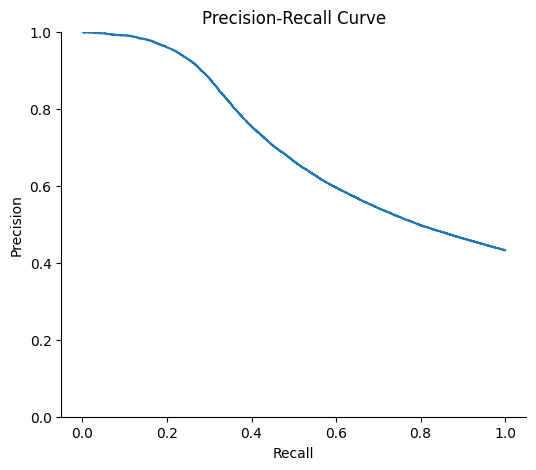

In [34]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, predictions)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision)
plt.ylim(0, 1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

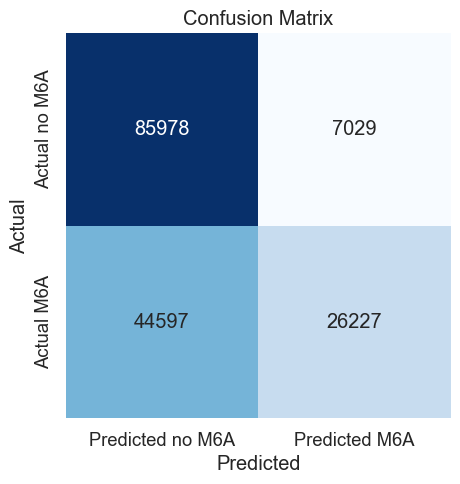

In [35]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, binary_predictions)

plt.figure(figsize=(6, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted no M6A", "Predicted M6A"],
            yticklabels=["Actual no M6A", "Actual M6A"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Different base-window sizes

In [36]:
# calculate fdr and tpr rates
def calculate_fdr_tpr(y_true, y_pred):
    _, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fdr = fp / (fp + tp) if (fp + tp) > 0 else 0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    return fdr, tpr

In [43]:
def train_baseline_lstm(train_set, val_set, num_nucleotides, num_epochs):

    # build train set
    train_features, y_train = filter_set_by_base_quality(train_set)
    train_features = set_num_nucleotides(train_features, num_nucleotides)
    X_train = train_features.transpose((0, 2, 1))

    # build val set    
    val_features, y_val = filter_set_by_base_quality(val_set)
    val_features = set_num_nucleotides(val_features, num_nucleotides)
    X_val = val_features.transpose((0, 2, 1)) 
    
    # dynamically set input_shape for model
    input_shape = ((num_nucleotides * 2 + 1), 5)     
    
    # lstm architecture
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    train_loss_history = []
    train_accuracy_history = []
    val_loss_history = []
    val_accuracy_history = []

    epochs = num_epochs

    for epoch in range(epochs):
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32)
        
        train_loss_history.append(history.history['loss'])
        train_accuracy_history.append(history.history['accuracy'])
        val_loss_history.append(history.history['val_loss'])
        val_accuracy_history.append(history.history['val_accuracy'])
        
        if epoch == epochs - 1:
            y_val_pred = (model.predict(X_val) > 0.5).astype(int)
            val_fdr, val_tpr = calculate_fdr_tpr(y_val, y_val_pred)
            print(f"Epoch {epoch + 1}/{epochs} - "
                  f"Train Loss: {history.history['loss'][0]:.4f}, "
                  f"Train Acc: {history.history['accuracy'][0]:.4f}, "
                  f"Val Loss: {history.history['val_loss'][0]:.4f}, "
                  f"Val Acc: {history.history['val_accuracy'][0]:.4f}, "
                  f"Val FDR: {val_fdr:.4f}, "
                  f"Val TPR: {val_tpr:.4f}")
            
    return val_fdr, val_tpr, train_loss_history[-1], train_accuracy_history[-1], val_loss_history[-1], val_accuracy_history[-1]

In [44]:
# try out all combinations of nucleotide windows + get metrics
# this ranges from 0 (only have info on central nucleotide) to 7 (this results in 15 total nucleotides, including the center)

tprs_list = []
fdrs_list = []
train_loss = []
train_accuracy = []
val_loss = []
val_accuracy = []

for num_nucleotides in range(8):
    print(f"Training with num_nucleotides = {num_nucleotides}")
    fdr, tpr, tloss, taccuracy, vloss, vaccuracy = train_baseline_lstm(train_set, val_set, num_nucleotides, 10)
    
    tprs_list.append(tpr)
    fdrs_list.append(fdr)
    train_loss.append(tloss)
    train_accuracy.append(taccuracy)
    val_loss.append(vloss)
    val_accuracy.append(vaccuracy)

Training with num_nucleotides = 0
1302/1302 [==============================] - 2s 1ms/step
Epoch 10/10 - Train Loss: 0.6496, Train Acc: 0.6228, Val Loss: 0.6540, Val Acc: 0.6134, Val FDR: 0.2987, Val TPR: 0.2405
Training with num_nucleotides = 1
1302/1302 [==============================] - 3s 2ms/step
Epoch 10/10 - Train Loss: 0.6363, Train Acc: 0.6349, Val Loss: 0.6440, Val Acc: 0.6232, Val FDR: 0.2956, Val TPR: 0.2753
Training with num_nucleotides = 2
1302/1302 [==============================] - 4s 2ms/step
Epoch 10/10 - Train Loss: 0.6252, Train Acc: 0.6471, Val Loss: 0.6364, Val Acc: 0.6334, Val FDR: 0.2989, Val TPR: 0.3181
Training with num_nucleotides = 3
1302/1302 [==============================] - 5s 3ms/step
Epoch 10/10 - Train Loss: 0.6122, Train Acc: 0.6615, Val Loss: 0.6288, Val Acc: 0.6490, Val FDR: 0.2662, Val TPR: 0.3413
Training with num_nucleotides = 4
1302/1302 [==============================] - 5s 3ms/step
Epoch 10/10 - Train Loss: 0.5998, Train Acc: 0.6747, Val Loss

In [56]:
train_accuracy

[0.6227942109107971,
 0.6348615288734436,
 0.6470692157745361,
 0.661523163318634,
 0.6747196912765503,
 0.6852061152458191,
 0.6954666972160339,
 0.7032429575920105]

In [58]:
val_accuracy

[0.6134306788444519,
 0.6231783032417297,
 0.6333581209182739,
 0.6490360498428345,
 0.6624571084976196,
 0.6683872938156128,
 0.6776548027992249,
 0.6874985098838806]

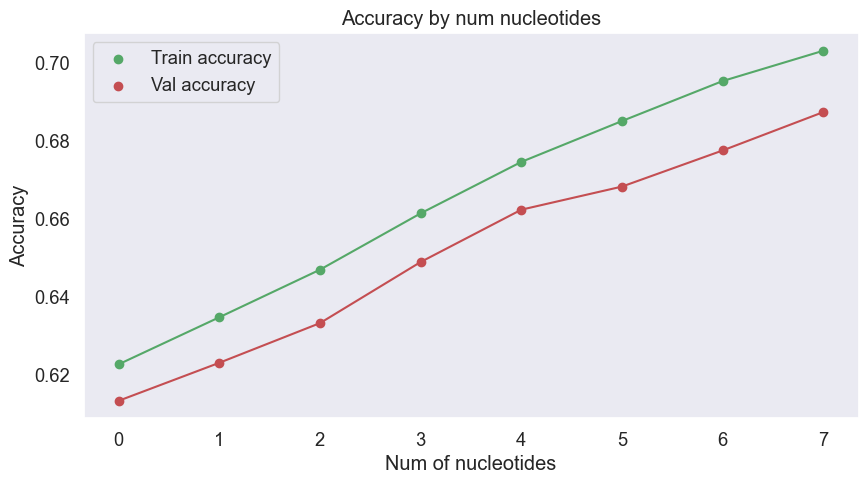

In [79]:
from itertools import chain
train_accuracy = list(chain(*train_accuracy))
val_accuracy = list(chain(*val_accuracy))

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, 'g')
plt.plot(val_accuracy, 'r')

plt.scatter(range(len(train_accuracy)), train_accuracy, c='g', label='Train accuracy', marker='o')
plt.scatter(range(len(val_accuracy)), val_accuracy, c='r', label='Val accuracy', marker='o')

plt.xlabel('Num of nucleotides')
plt.ylabel('Accuracy')
plt.title('Accuracy by num nucleotides')

plt.legend()
plt. grid(False)
plt.show()


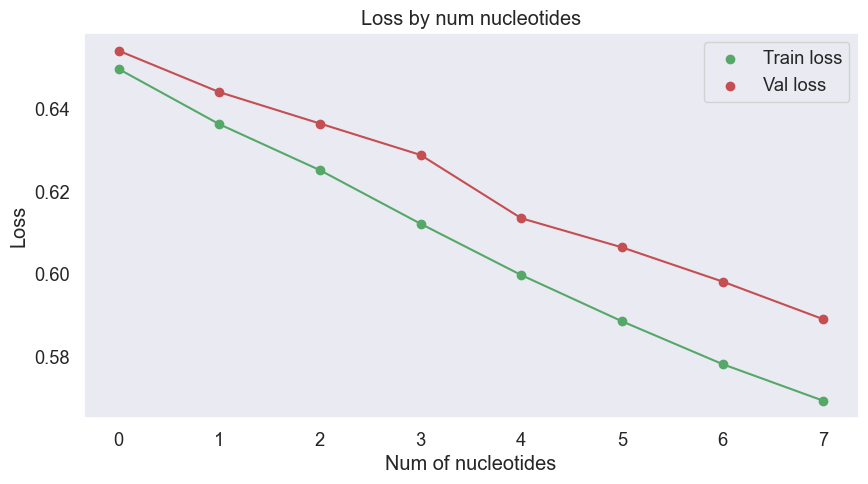

In [80]:
train_loss = list(chain(*train_loss))
val_loss = list(chain(*val_loss))

plt.figure(figsize=(10, 5))
plt.plot(train_loss, 'g')
plt.plot(val_loss, 'r')

plt.scatter(range(len(train_loss)), train_loss, c='g', label='Train loss', marker='o')
plt.scatter(range(len(val_loss)), val_loss, c='r', label='Val loss', marker='o')

plt.xlabel('Num of nucleotides')
plt.ylabel('Loss')
plt.title('Loss by num nucleotides')

plt.legend()
plt. grid(False)
plt.show()


40.58% of the actual positive instances in your validation set were correctly predicted as positive.

20.18% of the instances that the model predicted as the positive class, were actually negative.

In [47]:
tprs_list

[0.29867291178766586,
 0.29557594850020547,
 0.2989265070189926,
 0.2662292817679558,
 0.2060806513166264,
 0.23861683848797252,
 0.23943661971830985,
 0.2018319646241314]

In [48]:
fdrs_list

[0.2404710920770878,
 0.275321199143469,
 0.31814775160599573,
 0.3412740899357602,
 0.33410064239828696,
 0.37955032119914345,
 0.41049250535331905,
 0.4058351177730193]

In [48]:
fdrs_list = list(chain(*fdrs_list))
tprs_list = list(chain(*tprs_list))

plt.figure(figsize=(10, 5))

plt.plot(fdrs_list, 'm')
plt.plot(tprs_list, 'b')

plt.scatter(range(len(tprs_list)), fdrs_list, c='m', label='False discovery rate', marker='o')
plt.scatter(range(len(tprs_list)), tprs_list, c='b', label='True positive rate', marker='o')

plt.xlabel('Num of nucleotides')
plt.ylabel('Score')
plt.title('FDR + TPR by num nucleotides')

plt.legend()
plt. grid(False)
plt.show()


### Hparam search & more LSTM-CNN hybrid architecture

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import MaxPooling1D, Conv1D, Flatten

num_nucleotides = 7

# build train set
train_features, y_train = filter_set_by_base_quality(train_set)
train_features = set_num_nucleotides(train_features, num_nucleotides)
X_train = train_features.transpose((0, 2, 1))

# build val set    
val_features, y_val = filter_set_by_base_quality(val_set)
val_features = set_num_nucleotides(val_features, num_nucleotides)
X_val = val_features.transpose((0, 2, 1)) 

# dynamically set input_shape for model
full_window = num_nucleotides * 2 + 1
input_shape = ((full_window), 5)   

model = Sequential()

# lstm layer
model.add(LSTM(64, input_shape=input_shape, return_sequences=True))

# convolutional layers & max pooling
model.add(Conv1D(32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

# flatten
model.add(Flatten())

# dense/output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

epochs = 20

for epoch in range(epochs):
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32)
    
    train_loss_history.append(history.history['loss'])
    train_accuracy_history.append(history.history['accuracy'])
    val_loss_history.append(history.history['val_loss'])
    val_accuracy_history.append(history.history['val_accuracy'])
    
    print(f"Epoch {epoch + 1}/{epochs} - "
          f"Train Loss: {history.history['loss'][0]:.4f}, "
          f"Train Acc: {history.history['accuracy'][0]:.4f}, "
          f"Val Loss: {history.history['val_loss'][0]:.4f}, "
          f"Val Acc: {history.history['val_accuracy'][0]:.4f}")

NameError: name 'filter_set_by_base_quality' is not defined

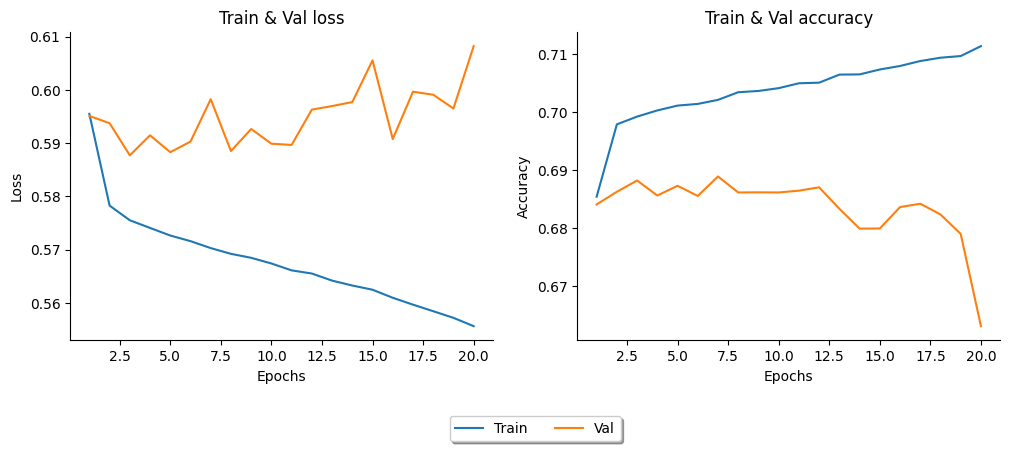

In [50]:
sns.reset_orig()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('Train & Val loss')
plt.plot(range(1, epochs + 1), train_loss_history, label='Train')
plt.plot(range(1, epochs + 1), val_loss_history,label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(1, 2, 2)
plt.title('Train & Val accuracy')
plt.plot(range(1, epochs + 1), train_accuracy_history, label='Train')
plt.plot(range(1, epochs + 1), val_accuracy_history, label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc='lower center', bbox_to_anchor=(-0.1, -0.35), fancybox=True, shadow=True, ncol=2)

plt.show()

In [45]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 15, 64)            17920     
                                                                 
 conv1d_13 (Conv1D)          (None, 15, 32)            6176      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 7, 32)            0         
 1D)                                                             
                                                                 
 conv1d_14 (Conv1D)          (None, 7, 64)             6208      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 192)             

### Softvoting ensemble LSTM + CNN-LSTM hybrids with different hparam

#### LSTM Hparam search

In [14]:
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout

epochs = 10
num_nucleotides = 7

# build train set
train_features, y_train = filter_set_by_base_quality(train_set)
train_features = set_num_nucleotides(train_features, num_nucleotides)
X_train = train_features.transpose((0, 2, 1))

# build val set    
val_features, y_val = filter_set_by_base_quality(val_set)
val_features = set_num_nucleotides(val_features, num_nucleotides)
X_val = val_features.transpose((0, 2, 1))

# build test set    
test_features, y_test = filter_set_by_base_quality(test_set)
test_features = set_num_nucleotides(test_features, num_nucleotides)
X_test = test_features.transpose((0, 2, 1)) 

# dynamically set input_shape for model
full_window = num_nucleotides * 2 + 1
input_shape = ((full_window), 5)  

# hyperparameter tuning
num_hidden_layers = [1]
num_units = [32, 64, 128]
dropout_rates = [0.0] # 0.1, 0.2
activation_functions = ['relu', 'tanh']
learning_rates = [0.05, 0.1, 0.15]
momentum_values = [0.0, 0.1, 0.5, 0.9]
batch_sizes = [32, 64, 128]

best_accuracy = 0.0
best_model_params = None

num_search_iterations = 5

top_models = []
top_models_info = []

for search_iteration in range(num_search_iterations):
    num_hidden = random.choice(num_hidden_layers)
    num_unit = random.choice(num_units)
    dropout_rate = random.choice(dropout_rates)
    activation_function = random.choice(activation_functions)
    learning_rate = random.choice(learning_rates)
    momentum = random.choice(momentum_values)
    batch_size = random.choice(batch_sizes)

    model = Sequential()
    for _ in range(num_hidden):
        if _ == 0:
            model.add(LSTM(num_unit, input_shape=input_shape, return_sequences=(num_hidden > 1)))
        else:
            model.add(LSTM(num_unit, return_sequences=(_ < num_hidden)))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate, beta_1=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    for epoch in range(epochs):
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, verbose=0)
        val_accuracy = history.history['val_accuracy'][-1]
    
        print(f"Iteration {search_iteration + 1}/{num_search_iterations} - "
            f"Epoch {epoch + 1}/{epochs}, " 
            f"Val Acc: {val_accuracy:.4f}")
    
    if val_accuracy > best_accuracy:
            model_info = {
                'model': model,
                'val_accuracy': val_accuracy,
                'hyperparameters': {
                    'Hidden Layers': num_hidden,
                    'Units': num_unit,
                    'Dropout': dropout_rate,
                    'Activation': activation_function,
                    'Learning Rate': learning_rate,
                    'Momentum': momentum,
                    'Batch Size': batch_size
                }
            }
            top_models_info.append(model_info)
        

Iteration 1/5 - Epoch 1/10, Val Acc: 0.6715
Iteration 1/5 - Epoch 2/10, Val Acc: 0.6773
Iteration 1/5 - Epoch 3/10, Val Acc: 0.6854
Iteration 1/5 - Epoch 4/10, Val Acc: 0.6836
Iteration 1/5 - Epoch 5/10, Val Acc: 0.6835
Iteration 1/5 - Epoch 6/10, Val Acc: 0.6845
Iteration 1/5 - Epoch 7/10, Val Acc: 0.6827
Iteration 1/5 - Epoch 8/10, Val Acc: 0.6829
Iteration 1/5 - Epoch 9/10, Val Acc: 0.6857
Iteration 1/5 - Epoch 10/10, Val Acc: 0.6856
Iteration 2/5 - Epoch 1/10, Val Acc: 0.6821
Iteration 2/5 - Epoch 2/10, Val Acc: 0.6778
Iteration 2/5 - Epoch 3/10, Val Acc: 0.6796
Iteration 2/5 - Epoch 4/10, Val Acc: 0.6778
Iteration 2/5 - Epoch 5/10, Val Acc: 0.6734
Iteration 2/5 - Epoch 6/10, Val Acc: 0.6815
Iteration 2/5 - Epoch 7/10, Val Acc: 0.6806
Iteration 2/5 - Epoch 8/10, Val Acc: 0.6710
Iteration 2/5 - Epoch 9/10, Val Acc: 0.6811
Iteration 2/5 - Epoch 10/10, Val Acc: 0.6611
Iteration 3/5 - Epoch 1/10, Val Acc: 0.6636
Iteration 3/5 - Epoch 2/10, Val Acc: 0.4573
Iteration 3/5 - Epoch 3/10, Va

In [15]:
# get top 3 models + hparam combos for ensemble

top_models_info.sort(key=lambda x: x['val_accuracy'], reverse=True)
top_3_models_info = top_models_info[:3]

print("\nTop 3 Models and Their Hyperparameters:")
for idx, model_info in enumerate(top_3_models_info, start=1):
    val_acc = model_info['val_accuracy']
    hparams = model_info['hyperparameters']
    
    print(f"Model {idx} - Validation Accuracy: {val_acc:.4f}")
    print("Hyperparameters:")
    for param, value in hparams.items():
        print(f"{param}: {value}")
    print("\n")


Top 3 Models and Their Hyperparameters:
Model 1 - Validation Accuracy: 0.6856
Hyperparameters:
Hidden Layers: 1
Units: 128
Dropout: 0.0
Activation: tanh
Learning Rate: 0.1
Momentum: 0.9
Batch Size: 128


Model 2 - Validation Accuracy: 0.6804
Hyperparameters:
Hidden Layers: 1
Units: 64
Dropout: 0.0
Activation: tanh
Learning Rate: 0.1
Momentum: 0.5
Batch Size: 64


Model 3 - Validation Accuracy: 0.6724
Hyperparameters:
Hidden Layers: 1
Units: 128
Dropout: 0.0
Activation: relu
Learning Rate: 0.15
Momentum: 0.5
Batch Size: 64




In [16]:
top_3_models_info

[{'model': <keras.engine.sequential.Sequential at 0x1b684d6ffa0>,
  'val_accuracy': 0.6856257915496826,
  'hyperparameters': {'Hidden Layers': 1,
   'Units': 128,
   'Dropout': 0.0,
   'Activation': 'tanh',
   'Learning Rate': 0.1,
   'Momentum': 0.9,
   'Batch Size': 128}},
 {'model': <keras.engine.sequential.Sequential at 0x1b69642b9d0>,
  'val_accuracy': 0.680439829826355,
  'hyperparameters': {'Hidden Layers': 1,
   'Units': 64,
   'Dropout': 0.0,
   'Activation': 'tanh',
   'Learning Rate': 0.1,
   'Momentum': 0.5,
   'Batch Size': 64}},
 {'model': <keras.engine.sequential.Sequential at 0x1b68ceb4e20>,
  'val_accuracy': 0.6723968386650085,
  'hyperparameters': {'Hidden Layers': 1,
   'Units': 128,
   'Dropout': 0.0,
   'Activation': 'relu',
   'Learning Rate': 0.15,
   'Momentum': 0.5,
   'Batch Size': 64}}]

In [17]:
import pickle

model_tuples = [(f'model_{idx + 1}', model_info['model']) for idx, model_info in enumerate(top_3_models_info)]

for model_name, model in model_tuples:
    filename = "lstm_" + model_name
    
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://2ad50687-3d60-423f-99d5-45fff29b053c/assets


INFO:tensorflow:Assets written to: ram://2ad50687-3d60-423f-99d5-45fff29b053c/assets


INFO:tensorflow:Assets written to: ram://08d08246-0f82-4e2a-a2af-0ab10eb094ef/assets


INFO:tensorflow:Assets written to: ram://08d08246-0f82-4e2a-a2af-0ab10eb094ef/assets


INFO:tensorflow:Assets written to: ram://52e2c4dc-0f23-47d9-9578-2e66d625d851/assets


INFO:tensorflow:Assets written to: ram://52e2c4dc-0f23-47d9-9578-2e66d625d851/assets


#### LSTM-CNN Hybrid hparam search

In [21]:
epochs = 10
num_nucleotides = 7

# build train set
train_features, y_train = filter_set_by_base_quality(train_set)
train_features = set_num_nucleotides(train_features, num_nucleotides)
X_train = train_features.transpose((0, 2, 1))

# build val set    
val_features, y_val = filter_set_by_base_quality(val_set)
val_features = set_num_nucleotides(val_features, num_nucleotides)
X_val = val_features.transpose((0, 2, 1)) 

# build test set    
test_features, y_test = filter_set_by_base_quality(test_set)
test_features = set_num_nucleotides(test_features, num_nucleotides)
X_test = test_features.transpose((0, 2, 1)) 

# dynamically set input_shape for model
full_window = num_nucleotides * 2 + 1
input_shape = ((full_window), 5) 

# hyperparameter tuning
num_hidden_layers = [1]
num_units_lstms = [32, 64, 128]
num_units_convs = [32, 64, 128]
dropout_rates = [0.0, 0.1, 0.2]
activation_functions = ['relu', 'tanh']
learning_rates = [0.05, 0.1, 0.15]
momentum_values = [0.0, 0.1, 0.5, 0.9]
batch_sizes = [32, 64, 128]
pool_sizes = [2, 3]
kernel_sizes = [3, 5, 10]

best_accuracy = 0.0
best_model_params = None

num_search_iterations = 5

top_hybrid_models = []
top_hybrid_models_info = []

for search_iteration in range(num_search_iterations):
    num_hidden = random.choice(num_hidden_layers)
    num_units_lstm = random.choice(num_units_lstms)
    num_units_conv = random.choice(num_units_convs)
    dropout_rate = random.choice(dropout_rates)
    activation_function = random.choice(activation_functions)
    learning_rate = random.choice(learning_rates)
    momentum = random.choice(momentum_values)
    batch_size = random.choice(batch_sizes)
    kernel_size = random.choice(kernel_sizes)
    pool_size = random.choice(pool_sizes)
    
    model = Sequential()

    # lstm layer
    model.add(LSTM(num_units_lstm, input_shape=input_shape, return_sequences=True))

    # convolutional layers & max pooling
    model.add(Conv1D(num_units_conv, kernel_size=kernel_size, activation=activation_function, padding='same'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(num_units_conv, kernel_size=kernel_size, activation=activation_function, padding='same'))
    model.add(MaxPooling1D(pool_size=pool_size))

    # flatten
    model.add(Flatten())

    # dense/output layer
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate, beta_1=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    for epoch in range(epochs):
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, verbose=0)
        val_accuracy = history.history['val_accuracy'][-1]

        print(f"Iteration {search_iteration + 1}/{num_search_iterations} - "
            f"Epoch {epoch + 1}/{epochs}, " 
            f"Val Acc: {val_accuracy:.4f}")
        
    if val_accuracy > best_accuracy:
        model_info = {
            'model': model,
            'val_accuracy': val_accuracy,
            'hyperparameters': {
                'Hidden Layers': num_hidden,
                'LSTM Units': num_units_lstm,
                'CNN Units': num_units_conv,
                'Dropout': dropout_rate,
                'Activation': activation_function,
                'Learning Rate': learning_rate,
                'Momentum': momentum,
                'Pool Size': pool_size,
                'Kernel Size': kernel_size,
                'Batch Size': batch_size
            }
        }
        top_hybrid_models_info.append(model_info)
    

Iteration 1/5 - Epoch 1/10, Val Acc: 0.5515
Iteration 1/5 - Epoch 2/10, Val Acc: 0.4485
Iteration 1/5 - Epoch 3/10, Val Acc: 0.5515
Iteration 1/5 - Epoch 4/10, Val Acc: 0.4485
Iteration 1/5 - Epoch 5/10, Val Acc: 0.5515
Iteration 1/5 - Epoch 6/10, Val Acc: 0.5515
Iteration 1/5 - Epoch 7/10, Val Acc: 0.4485
Iteration 1/5 - Epoch 8/10, Val Acc: 0.4485
Iteration 1/5 - Epoch 9/10, Val Acc: 0.4485
Iteration 1/5 - Epoch 10/10, Val Acc: 0.5515
Iteration 2/5 - Epoch 1/10, Val Acc: 0.5515
Iteration 2/5 - Epoch 2/10, Val Acc: 0.5515
Iteration 2/5 - Epoch 3/10, Val Acc: 0.5515
Iteration 2/5 - Epoch 4/10, Val Acc: 0.5515
Iteration 2/5 - Epoch 5/10, Val Acc: 0.5515
Iteration 2/5 - Epoch 6/10, Val Acc: 0.5515
Iteration 2/5 - Epoch 7/10, Val Acc: 0.5515
Iteration 2/5 - Epoch 8/10, Val Acc: 0.5515
Iteration 2/5 - Epoch 9/10, Val Acc: 0.5515
Iteration 2/5 - Epoch 10/10, Val Acc: 0.5515
Iteration 3/5 - Epoch 1/10, Val Acc: 0.5515
Iteration 3/5 - Epoch 2/10, Val Acc: 0.5515
Iteration 3/5 - Epoch 3/10, Va

In [23]:
# get top 3 models + hparam combos for ensemble

top_hybrid_models_info.sort(key=lambda x: x['val_accuracy'], reverse=True)
top_3_hybrid_models_info = top_hybrid_models_info[:3]

print("\nTop 3 Models and Their Hyperparameters:")
for idx, model_info in enumerate(top_3_hybrid_models_info, start=1):
    val_acc = model_info['val_accuracy']
    hparams = model_info['hyperparameters']
    
    print(f"Model {idx} - Validation Accuracy: {val_acc:.4f}")
    print("Hyperparameters:")
    for param, value in hparams.items():
        print(f"{param}: {value}")
    print("\n")


Top 3 Models and Their Hyperparameters:
Model 1 - Validation Accuracy: 0.5515
Hyperparameters:
Hidden Layers: 1
LSTM Units: 128
CNN Units: 64
Dropout: 0.0
Activation: tanh
Learning Rate: 0.1
Momentum: 0.9
Pool Size: 2
Kernel Size: 5
Batch Size: 32


Model 2 - Validation Accuracy: 0.5515
Hyperparameters:
Hidden Layers: 1
LSTM Units: 128
CNN Units: 128
Dropout: 0.2
Activation: relu
Learning Rate: 0.15
Momentum: 0.0
Pool Size: 3
Kernel Size: 5
Batch Size: 128


Model 3 - Validation Accuracy: 0.5515
Hyperparameters:
Hidden Layers: 1
LSTM Units: 64
CNN Units: 64
Dropout: 0.0
Activation: relu
Learning Rate: 0.15
Momentum: 0.0
Pool Size: 3
Kernel Size: 10
Batch Size: 64




In [24]:
top_3_hybrid_models_info

[{'model': <keras.engine.sequential.Sequential at 0x1b683025b10>,
  'val_accuracy': 0.5515113472938538,
  'hyperparameters': {'Hidden Layers': 1,
   'LSTM Units': 128,
   'CNN Units': 64,
   'Dropout': 0.0,
   'Activation': 'tanh',
   'Learning Rate': 0.1,
   'Momentum': 0.9,
   'Pool Size': 2,
   'Kernel Size': 5,
   'Batch Size': 32}},
 {'model': <keras.engine.sequential.Sequential at 0x1b6829f0af0>,
  'val_accuracy': 0.5515113472938538,
  'hyperparameters': {'Hidden Layers': 1,
   'LSTM Units': 128,
   'CNN Units': 128,
   'Dropout': 0.2,
   'Activation': 'relu',
   'Learning Rate': 0.15,
   'Momentum': 0.0,
   'Pool Size': 3,
   'Kernel Size': 5,
   'Batch Size': 128}},
 {'model': <keras.engine.sequential.Sequential at 0x1b682eb2920>,
  'val_accuracy': 0.5515113472938538,
  'hyperparameters': {'Hidden Layers': 1,
   'LSTM Units': 64,
   'CNN Units': 64,
   'Dropout': 0.0,
   'Activation': 'relu',
   'Learning Rate': 0.15,
   'Momentum': 0.0,
   'Pool Size': 3,
   'Kernel Size': 10,

In [33]:
model_tuples = [(f'model_{idx + 1}', model_info['model']) for idx, model_info in enumerate(top_3_hybrid_models_info)]

for model_name, model in model_tuples:
    filename = "hybrid_" + model_name
    
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://aff1fdf1-d81b-4e6d-8e9e-6aedb92ee4bb/assets


INFO:tensorflow:Assets written to: ram://aff1fdf1-d81b-4e6d-8e9e-6aedb92ee4bb/assets


INFO:tensorflow:Assets written to: ram://07d2b4c9-3bf0-44a4-a655-8bbee07b28cd/assets


INFO:tensorflow:Assets written to: ram://07d2b4c9-3bf0-44a4-a655-8bbee07b28cd/assets


INFO:tensorflow:Assets written to: ram://343a7866-247e-4aa4-866a-cc932a15d9ad/assets


INFO:tensorflow:Assets written to: ram://343a7866-247e-4aa4-866a-cc932a15d9ad/assets


#### Ensembling votes

In [39]:
# ensemble members
# 3 LSTMS + 3 hybrids

import os
from sklearn.metrics import accuracy_score

use_pkls = False

# if models were trained in the same notebook run:
if not use_pkls:
    model_tuples_1 = [(f'model_{idx + 1}', model_info['model']) for idx, model_info in enumerate(top_3_models_info)]
    model_tuples_2 = [(f'model_{idx + 1}', model_info['model']) for idx, model_info in enumerate(top_3_hybrid_models_info)]

    model_tuples = model_tuples_1 + model_tuples_2

# if you are using models saved as .pkl's :
else:
    dir_path = "C:\\Users\\Cat\\OneDrive\\Documents\\ont_m6a\\crasgaitis" 

    for filename in os.listdir(dir_path):
        if filename.endswith('.pkl'):
            file_path = os.path.join(dir_path, filename)
            
            with open(file_path, 'rb') as file:
                loaded_model = pickle.load(file)   
                    
            model_tuples.append((filename, loaded_model))


In [48]:
model_tuples[:4]

[('model_1', <keras.engine.sequential.Sequential at 0x1b684d6ffa0>),
 ('model_2', <keras.engine.sequential.Sequential at 0x1b69642b9d0>),
 ('model_3', <keras.engine.sequential.Sequential at 0x1b68ceb4e20>),
 ('model_1', <keras.engine.sequential.Sequential at 0x1b683025b10>)]

In [112]:
# ensemble test
train_votes = []
test_votes = []

for model_name, model in model_tuples[:4]:
    y_pred_individual = model.predict(X_train)
    train_votes.append((model, y_pred_individual))
    y_pred_individual = model.predict(X_test)
    test_votes.append((model, y_pred_individual))

individual_predictions = [vote[1] for vote in train_votes]
average_vote = np.sum(individual_predictions, axis=0) / 4
binary_predictions = (average_vote >= 0.5).astype(int)

accuracy = accuracy_score(y_train, binary_predictions)
print(f"Ensemble Train Accuracy: {accuracy:.4f}")

individual_predictions = [vote[1] for vote in test_votes]
average_vote = (0.9 * (np.sum(individual_predictions[:3], axis=0) / 3)) + 0.1 * (individual_predictions[-1])
binary_predictions = (average_vote >= 0.5).astype(int)

accuracy = accuracy_score(y_test, binary_predictions)
print(f"Ensemble Test Accuracy: {accuracy:.4f}")

Ensemble Test Accuracy: 0.6804


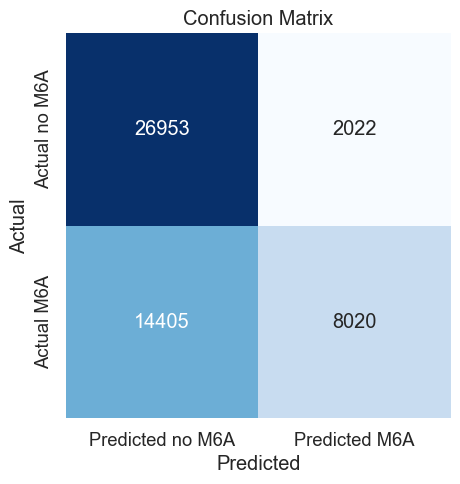

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, binary_predictions)

plt.figure(figsize=(6, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted no M6A", "Predicted M6A"],
            yticklabels=["Actual no M6A", "Actual M6A"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Eval plot

In [55]:
bins = [i / 10 for i in range(11)]
# hist, bin_edges = plt.hist(average_vote, bins=bins, edgecolor='black')
# hist;

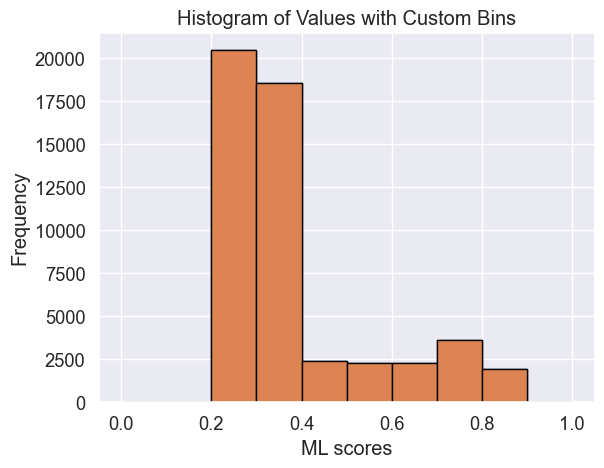

In [114]:
# bin confidences plot
plt.hist(average_vote, bins=bins, edgecolor='black')
plt.xlabel('ML scores')
plt.ylabel('Frequency')
plt.title('Histogram of Values with Custom Bins')
plt.show()

In [151]:
# get num of positives
import math


pred_1_true_1s = []
pred_0_true_1s = []

counts_label_1_s = []
counts_label_0_s = []

# bin set up
predictions = average_vote
bin_indices = np.digitize(predictions, bins)

# initialize arrays to get counts per bin
counts_label_1 = np.zeros(len(bins) - 1)
counts_label_0 = np.zeros(len(bins) - 1)

counts_pred_1 = np.zeros(len(bins) - 1)
counts_pred_0 = np.zeros(len(bins) - 1)

# count 1s and 0s in each bin
for i in range(1, len(bins)):
    bin_mask = (bin_indices == i)
    bin_mask = np.squeeze(bin_mask)
    # print(f"Bin {i} Mask:", np.unique(bin_mask, return_counts=True))
    
    # get labelled 1 and 0s per bin
    counts_label_1[i - 1] = np.sum(y_test[bin_mask] == 1)
    counts_label_0[i - 1] = np.sum(y_test[bin_mask] == 0)
    
    # get predicted 1 and 0s per bin
    counts_pred_1[i - 1] = np.sum(predictions[bin_mask] >= 0.5)
    counts_pred_0[i - 1] = np.sum(predictions[bin_mask] < 0.5) 
    
    # for each bin, get num of samples that are both predicted and true 1s  
    # for each bin, get num of samples that are both true 0 and predicted 1
    pred_1_true_1 = np.sum((y_test[bin_mask] == 1) & (predictions[bin_mask] >= 0.5))
    pred_0_true_1 = np.sum((y_test[bin_mask] == 1) & (predictions[bin_mask] < 0.5))

    pred_1_true_1s.append(pred_1_true_1)
    pred_0_true_1s.append(pred_0_true_1)
    
    counts_label_1_s.append(counts_label_1)
    counts_label_0_s.append(counts_label_0)


pred_1_true_1s = [0 if math.isinf(x) or math.isnan(x) else x for x in pred_1_true_1s]
pred_0_true_1s = [0 if math.isinf(x) or math.isnan(x) else x for x in pred_0_true_1s]

C:\Users\Cat\AppData\Local\Temp\ipykernel_21860\109254699.py:9: RuntimeWarning: invalid value encountered in divide
  plt.scatter(bins[:-1], pred_1_true_1s / np.squeeze(counts_label_1_s[0]), label='Pct. of pred 1 + true 1', marker='o')
C:\Users\Cat\AppData\Local\Temp\ipykernel_21860\109254699.py:10: RuntimeWarning: invalid value encountered in divide
  plt.scatter(bins[:-1], pred_0_true_1s / np.squeeze(counts_label_0_s[0]), label='Pct. pred 0 + true 1', marker='x')


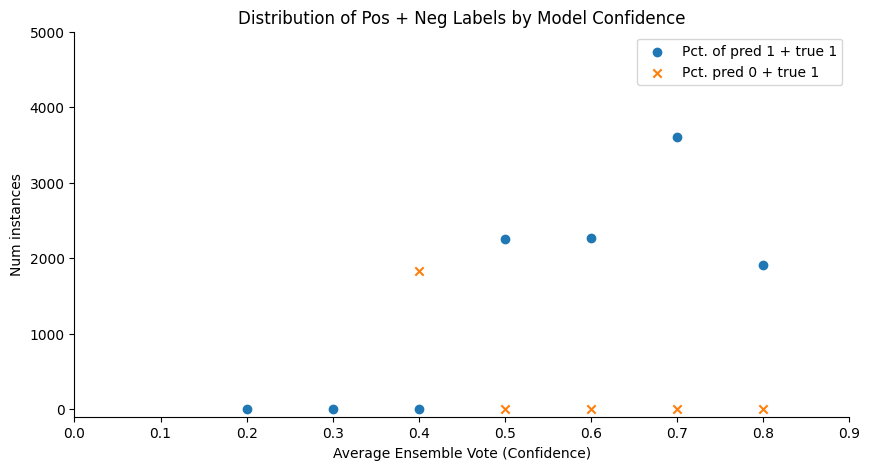

In [152]:
# plot

sns.reset_orig()
plt.figure(figsize=(10, 5))
# plt.bar(bins[:-1], pred_1_true_1s / np.squeeze(counts_label_1_s[0]), width=0.05, align='edge', label='Pct. of pred 1 + true 1')
# plt.bar(bins[:-1], pred_0_true_1s / np.squeeze(counts_label_0_s[0]), width=0.05, align='edge', label='Pct. pred 0 + true 1')


plt.scatter(bins[:-1], pred_1_true_1s / np.squeeze(counts_label_1_s[0]), label='Pct. of pred 1 + true 1', marker='o')
plt.scatter(bins[:-1], pred_0_true_1s / np.squeeze(counts_label_0_s[0]), label='Pct. pred 0 + true 1', marker='x')

plt.xticks(bins[:-1])
plt.ylim(-100, 5000)
plt.xlabel('Average Ensemble Vote (Confidence)')
plt.ylabel('Num instances')
plt.title('Distribution of Pos + Neg Labels by Model Confidence')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend()

plt.show()


In [ ]:
# todo: make a cdf version